In [14]:
## IMPORT NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import StandardScaler

In [15]:
## READING THE DATA AND CONVERTING IT INTO A DATAFRAME
uploaded = files.upload()

Saving hyundai.csv.csv to hyundai.csv (1).csv


In [16]:
## CONVERTING THE DATA INTO DATAFRAME
df = pd.read_csv('hyundai.csv.csv')
df.head()

,Adj Close
0,109247.6797
1,108868.3750
2,106213.0313
3,104316.3672
4,103557.7109


In [17]:
## CONVERTING THE DATAFRAME TO A NUMPY ARRAY
input = df.values
print(input)

print(len(input))



[[109247.6797]
 [108868.375 ]
 [106213.0313]
 ...
 [206500.    ]
 [216500.    ]
 [212000.    ]]
2200


In [18]:
## DECIDING THE TRAINING AND TEST SIZE OF DATA AND FINALLY SLICING OF THE DATA
input = df.values
split_percent = 0.7
tr_size = int(split_percent*len(input))
train = input[:tr_size]
test = input[tr_size:]

print(train.shape)

print(test.shape)

(1540, 1)
(660, 1)


In [19]:
## CREATION OF THE SEQUENCED DATA SETS FOR TRAINING AND TESTING
step = 4
train_data = TimeseriesGenerator(train, train, length = step, batch_size = 1)
test_data = TimeseriesGenerator(test, test, length = step, batch_size = 1)
train_data[0]



(array([[[109247.6797],
         [108868.375 ],
         [106213.0313],
         [104316.3672]]]),
 array([[103557.7109]]))

In [20]:
test_data[0]

(array([[[157745.1094],
         [157300.75  ],
         [158633.8281],
         [160855.5781]]]),
 array([[162632.9688]]))

In [21]:
## CONSTRUCTION OF THE SIMPLE RECURRENT NEURAL NETWORK
model = Sequential()
model.add(SimpleRNN(6, activation = 'relu', input_shape = (4,1), kernel_regularizer = 'L2'))
model.add(Dense(8, activation = 'relu', kernel_regularizer = 'L2'))
model.add(Dense(1, activation = 'relu', kernel_regularizer = 'L2'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 6)                 48        
                                                                 
 dense_2 (Dense)             (None, 8)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
## MODEL COMPILATION AND FITTING
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['mse', 'mae', 'mape'])
history = model.fit(train_data, epochs = 10, validation_data = test_data)

Epoch 1/10
1536/1536 [==============================] - 5s 2ms/step - loss: 5108572672.0000 - mse: 5108572672.0000 - mae: 39259.6445 - mape: 30.6230 - val_loss: 25532932.0000 - val_mse: 25532932.0000 - val_mae: 3563.1616 - val_mape: 1.7803
Epoch 2/10
1536/1536 [==============================] - 3s 2ms/step - loss: 14909316.0000 - mse: 14909316.0000 - mae: 2628.0706 - mape: 2.0871 - val_loss: 24309870.0000 - val_mse: 24309870.0000 - val_mae: 3422.3484 - val_mape: 1.7007
Epoch 3/10
1536/1536 [==============================] - 3s 2ms/step - loss: 15034007.0000 - mse: 15034007.0000 - mae: 2665.1184 - mape: 2.1168 - val_loss: 24374696.0000 - val_mse: 24374696.0000 - val_mae: 3406.6853 - val_mape: 1.6902
Epoch 4/10
1536/1536 [==============================] - 3s 2ms/step - loss: 14237628.0000 - mse: 14237628.0000 - mae: 2595.8975 - mape: 2.0731 - val_loss: 54368944.0000 - val_mse: 54368944.0000 - val_mae: 5942.4844 - val_mape: 3.0348
Epoch 5/10
1536/1536 [==============================] - 3s

In [23]:
## INLINE PREDICTION FROM THE NETWORK
yr_pred_train = model.predict(train_data)
yr_pred_train

1536/1536 [==============================] - 2s 1ms/step


array([[108182.5  ],
       [106801.984],
       [107234.52 ],
       ...,
       [161196.95 ],
       [161807.52 ],
       [161481.89 ]], dtype=float32)

In [24]:
## OUT OF SAMPLE PREDICTION
yr_pred_test = model.predict(test_data)
yr_pred_test

656/656 [==============================] - 1s 1ms/step


array([[162468.2 ],
       [164102.28],
       [165116.28],
       [164403.48],
       [164673.12],
       [166780.36],
       [168053.62],
       [169627.4 ],
       [169408.47],
       [169438.05],
       [167980.5 ],
       [167253.97],
       [166304.42],
       [164866.45],
       [165224.47],
       [164360.19],
       [166440.75],
       [166722.44],
       [167429.28],
       [167952.69],
       [166506.14],
       [167645.64],
       [168839.38],
       [168343.66],
       [167615.77],
       [167125.06],
       [167370.61],
       [168513.81],
       [170114.31],
       [170220.66],
       [170007.47],
       [168301.72],
       [166973.42],
       [166057.6 ],
       [166373.28],
       [162799.89],
       [159265.17],
       [158153.61],
       [156962.4 ],
       [155541.12],
       [155078.5 ],
       [155479.88],
       [155366.  ],
       [155264.94],
       [155997.4 ],
       [160476.81],
       [164454.52],
       [162950.81],
       [164041.58],
       [163869.69],


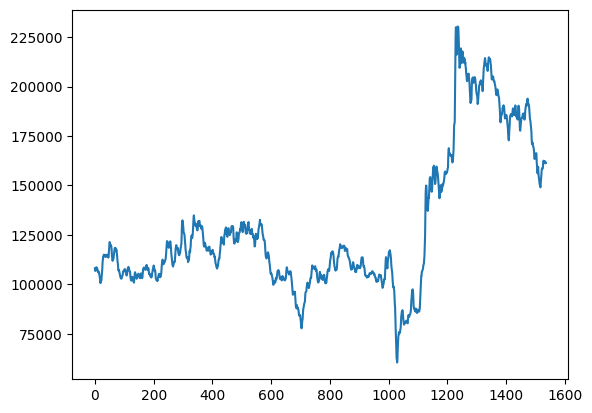

In [25]:
## PLOTTING THE TRAIN PREDICTIONS
plt.plot(yr_pred_train)

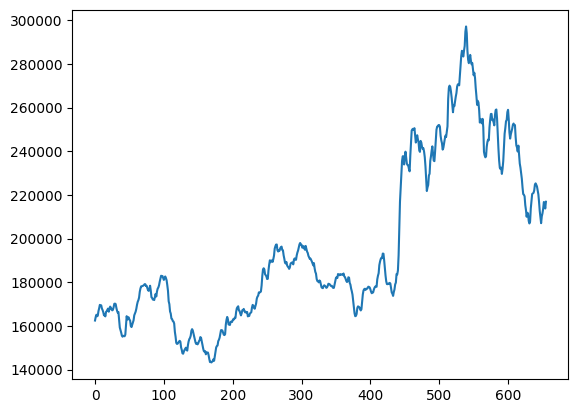

In [26]:
## PLOTTING THE TEST PREDICTIONS
plt.plot(yr_pred_test)